# Exploratory Data Analysis

In [1]:
#Saumya Shah
#Jait Purohit

import sklearn.feature_extraction.text as sk_text
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from pandas import Series
%matplotlib inline
#reading json file into tabular format
import json
import csv
import pandas as pd
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D
import time
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
import time

C:\Users\rutwi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
filename_read = 'data/train.csv'
df = pd.read_csv(filename_read, na_values=['NA','?'])

In [3]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [5]:
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df['Day'] = df['Dates'].dt.day
df['Hour'] = df['Dates'].dt.hour
df['Minutes'] = df['Dates'].dt.minute
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minutes
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30


In [6]:
df[df.isnull().any(axis=1)]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minutes


In [7]:
df.shape

(878049, 14)

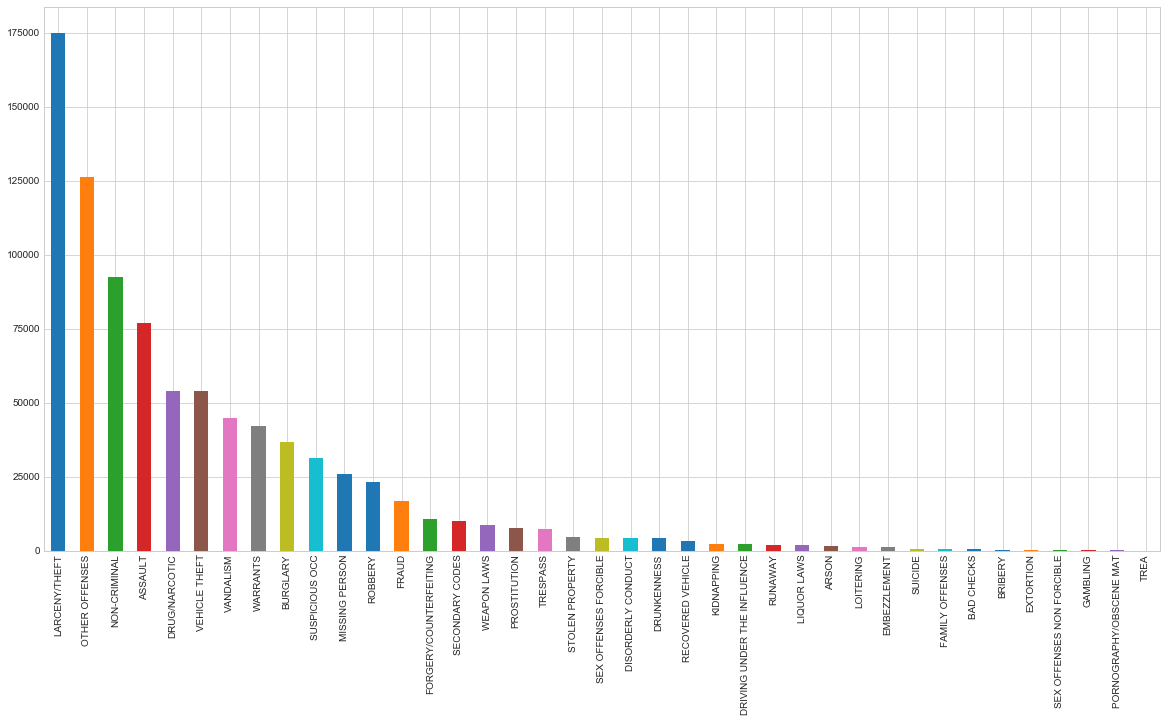

In [8]:
categories = df['Category'].unique()
category_dict = {value:index for index,value in enumerate(categories)}
y = df['Category'].map(category_dict)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
df.Category.value_counts().plot(kind='bar')

CAUTION: SCALES ARE DIFFERENT (so only use to notice the trend)


C:\Users\rutwi\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\rutwi\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\rutwi\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


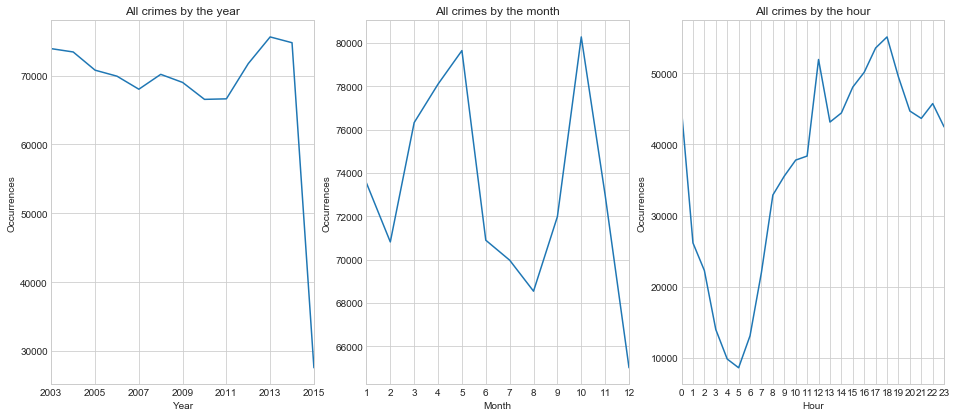

In [9]:
# All crimes by the hour, month, and year
plt.figure(figsize=(16, 320))
print("CAUTION: SCALES ARE DIFFERENT (so only use to notice the trend)")
for i, time in zip(range(3), ["Year", "Month", "Hour"]):
    time_data = {}
    p = plt.subplot(40, 3, i+1)
    for unit in df[time].unique():
        time_data[unit] = len(df[df[time] == unit])
        
    # Plot either a line chart (default) or bar chart (uncomment)
    sns.tsplot(data=list(time_data.values()), time=list(time_data.keys()))
    #plt.bar(list(time_data.keys()), list(time_data.values()))
    
    if time == "Year":
        # 1-by-1 tick marks are too close, resulting in label overlap of the years
        plt.xticks(np.arange(df[time].unique().min(),df[time].unique().max()+1,2))
    else:
        plt.xticks(np.arange(df[time].unique().min(),df[time].unique().max()+1,1))
    plt.title("All crimes by the " + time.lower())
    plt.ylabel("Occurrences")
    plt.xlabel(time)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


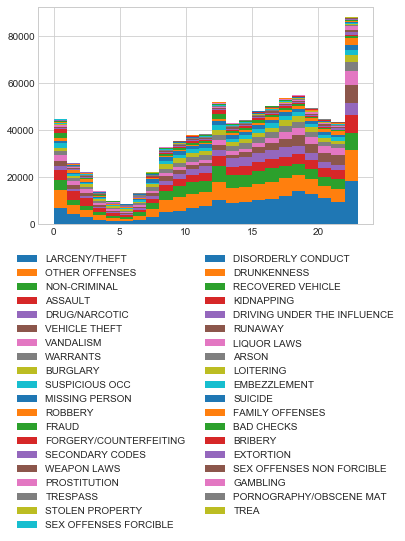

In [10]:
#Crime Ditribution by Hour
from matplotlib.font_manager import FontProperties
crime_categories = df['Category'].value_counts().index
crime_category_names = crime_categories
crimes_by_hours = []

for i in crime_categories:
    crimes_by_hours.append(df.loc[df['Category'] == i]['Hour'])
bins = np.arange(24)
print(bins)
plt.figure()
plt.hist(crimes_by_hours, bins, stacked=True, rwidth=10,label = crime_categories)
#plt.legend("title", prop=fontP)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11]


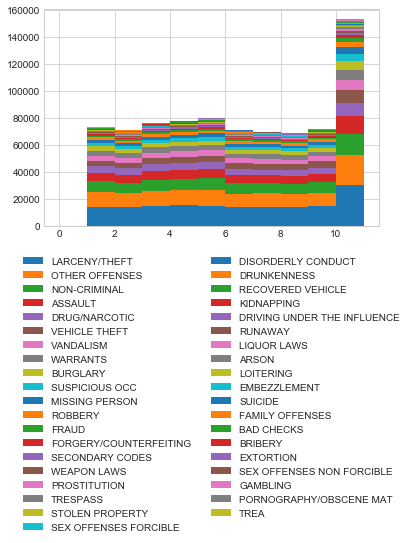

In [11]:
#Crime Ditribution by Month
from matplotlib.font_manager import FontProperties
crime_categories = df['Category'].value_counts().index
crime_category_names = crime_categories
crimes_by_months = []

for i in crime_categories:
    crimes_by_months.append(df.loc[df['Category'] == i]['Month'])
bins = np.arange(12)
print(bins)
plt.figure()
plt.hist(crimes_by_months, bins, stacked=True, rwidth=5,label = crime_categories)
#plt.legend("title", prop=fontP)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

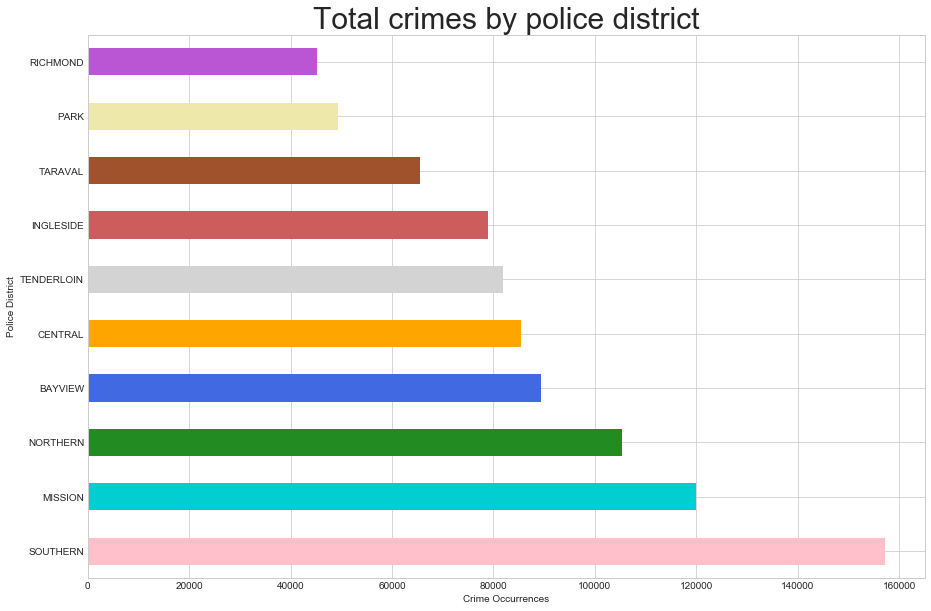

In [12]:
fig = plt.figure(figsize=(15,10))
colors = ["pink", "darkturquoise", "forestgreen", "royalblue", "Orange", "lightgrey", "indianred", "sienna", "palegoldenrod", "mediumorchid"]
df["Category"].groupby(df["PdDistrict"]).count().sort_values(ascending=False).plot(kind='barh', color=colors)
plt.title("Total crimes by police district", fontsize=30)
plt.xlabel("Crime Occurrences")
plt.ylabel("Police District")
plt.show()

Top 5 crimes per district, on the same scale (0 to 45,000 occurrences)


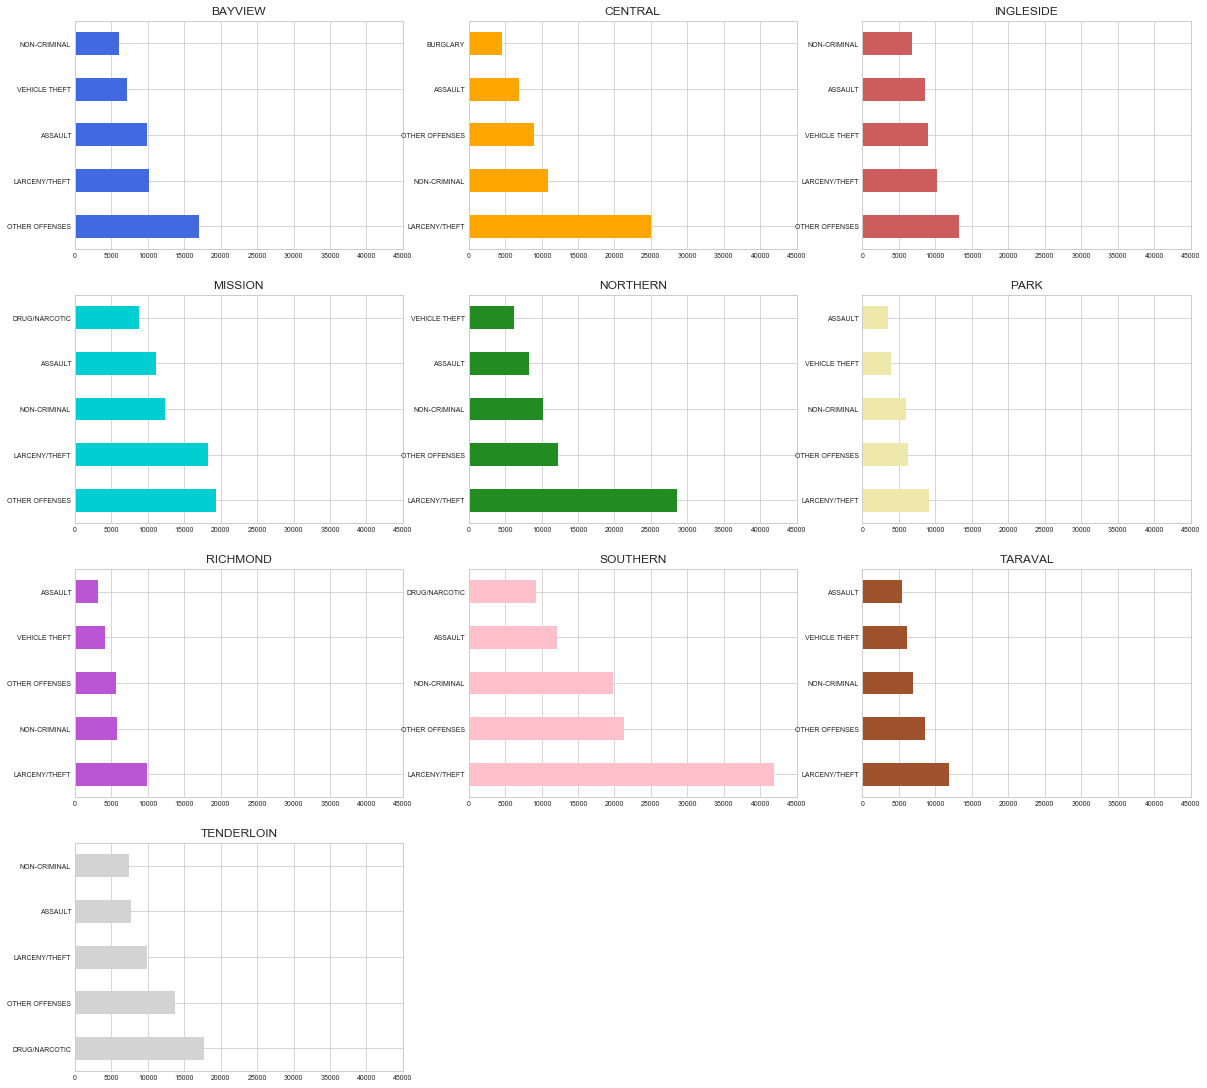

In [13]:
print("Top 5 crimes per district, on the same scale (0 to 45,000 occurrences)")
plt.figure(figsize=(20, 100))
colors = ["royalblue", "Orange", "indianred", "darkturquoise", "forestgreen", "palegoldenrod", "mediumorchid", "pink", "sienna", "lightgrey"]
i = 0
for district, group in df.groupby(df["PdDistrict"]):
    p = plt.subplot(20, 3, i+1)
    group["Category"].value_counts()[:5].plot(kind='barh', axes=p, fontsize=7, xlim=(0,45000), color=colors[i])
    plt.title(district)
    i = i + 1

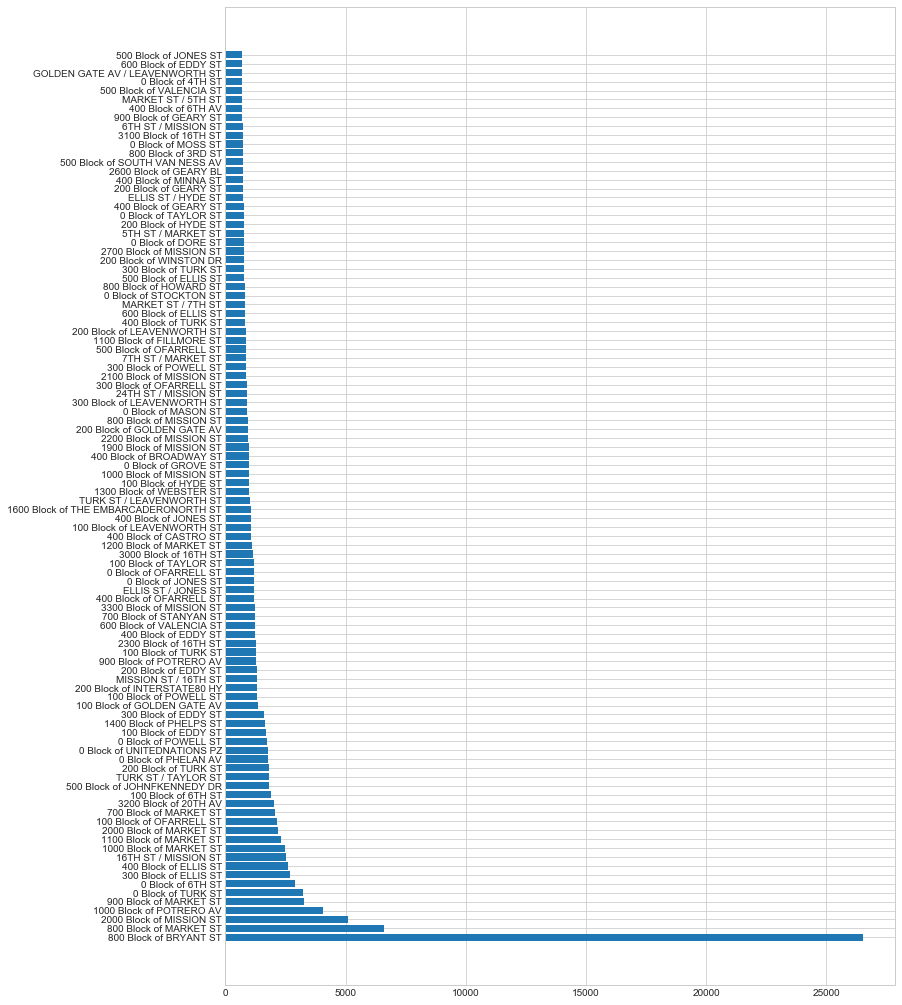

In [14]:
# The most criminal locations
top_addresses = df.Address.value_counts()[:100]
plt.figure(figsize=(12, 18))

pos = np.arange(len(top_addresses))
plt.barh(pos, top_addresses.values)
plt.yticks(pos, top_addresses.index);

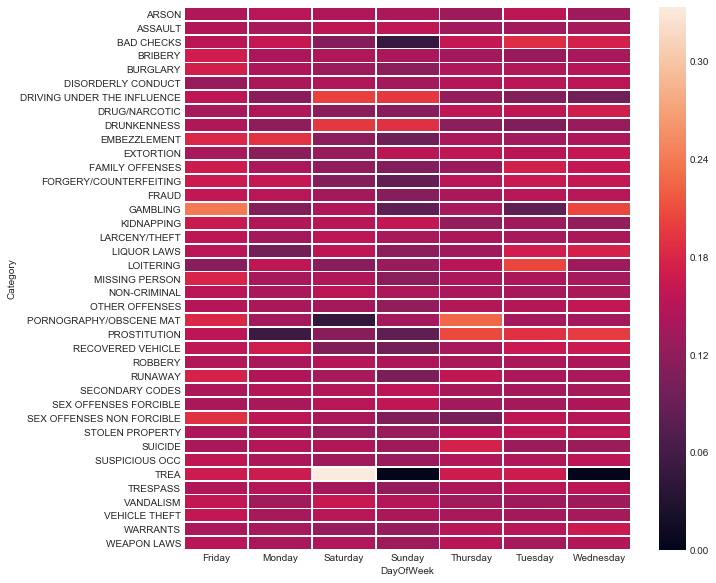

In [15]:
#Crime Ditribution by Day of the week
day_cross_cat = pd.crosstab(df.Category, df.DayOfWeek).apply(lambda r: r/r.sum(), axis=1)

plt.figure(figsize=(10, 10))
sns.heatmap(day_cross_cat, linewidths=.9);

# Feature Engineering and Data Pre-processing

In [16]:
topcrime=['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','DRUG/NARCOTIC']

In [17]:
df=df[df.Category.isin(topcrime)]

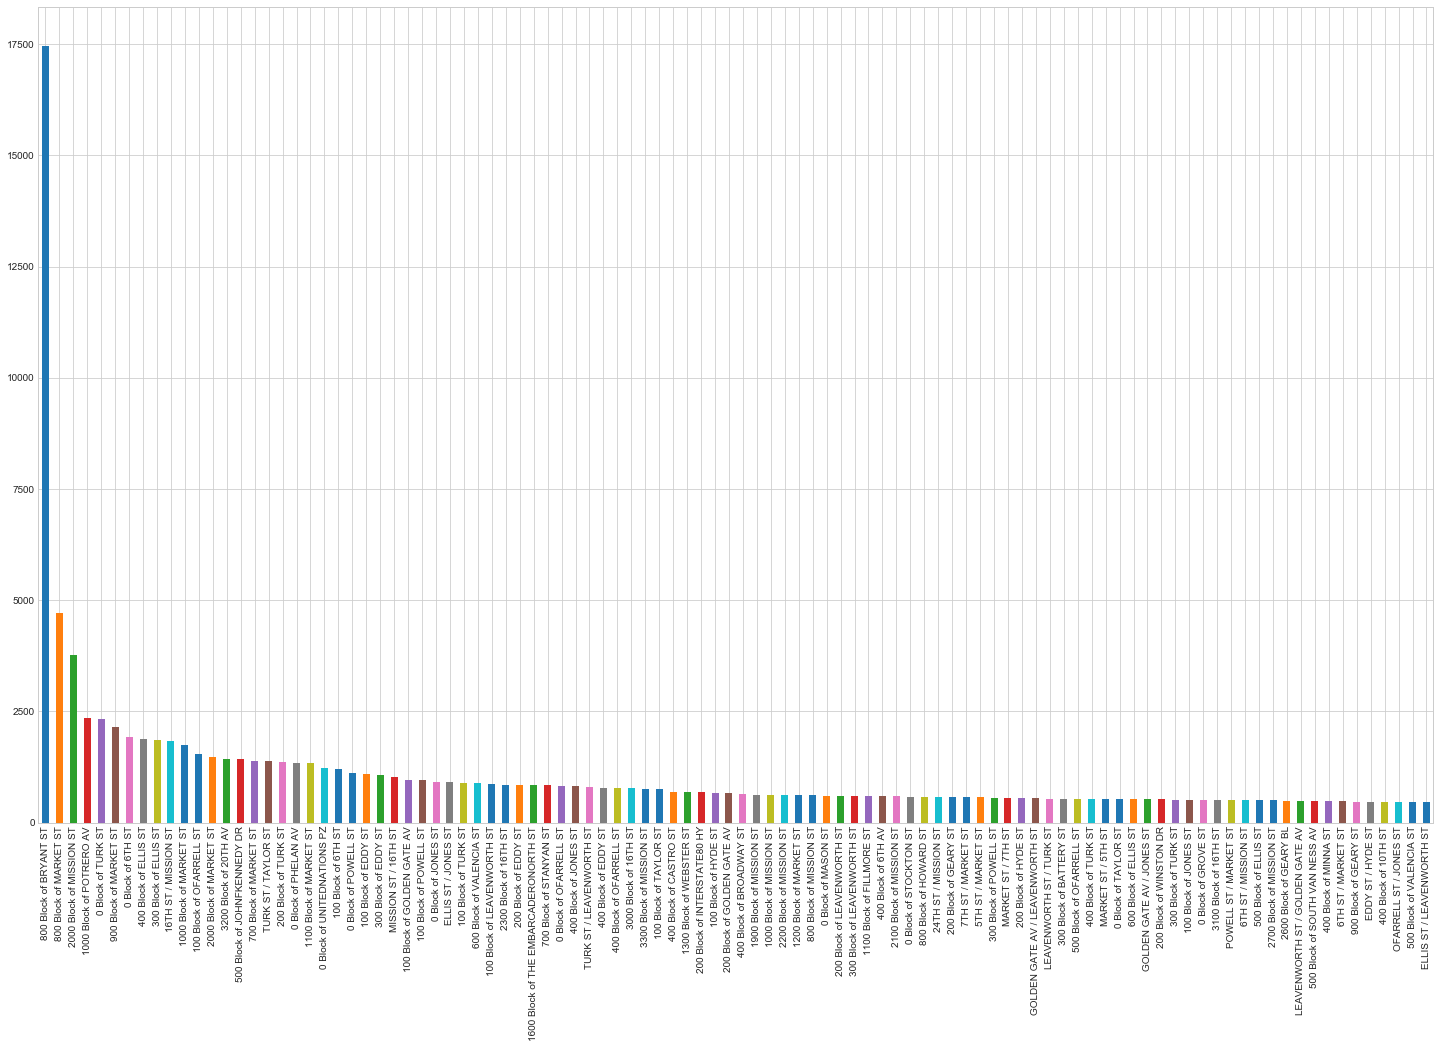

In [18]:
categories = df['Address'].unique()
category_dict = {value:index for index,value in enumerate(categories)}
y = df['Address'].map(category_dict)
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
df.Address.value_counts()[0:100].plot(kind='bar')

In [19]:
topstreets = df['Address'].value_counts()[:100]

In [20]:
df_temp = pd.DataFrame({'Address':topstreets.index})

In [21]:
df_list = df_temp.values.T.tolist()

In [22]:
df=df[df.Address.isin(df_list[0])]

In [23]:
df.shape

(107772, 14)

In [24]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
from sklearn.metrics import roc_curve, auc

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low


In [25]:
encode_text_index(df,'Year')

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015], dtype=int64)

In [26]:
sorted(df.Year.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [27]:
def get_hour_zone(hour):
    if hour >= 2 and hour < 8: 
        return 0
    elif hour >= 8 and hour < 12: 
        return 1
    elif hour >= 12 and hour < 18: 
        return 2
    elif hour >= 18 and hour < 22: 
        return 3
    elif hour < 2 or hour >= 22: 
        return 4
    
df["Hour_Zone"] = df["Hour"].map(get_hour_zone)
print(sorted(df['Hour_Zone'].unique()))

[0, 1, 2, 3, 4]


In [28]:
def get_season(month):
    if month in set([3, 4, 5]): 
        return 0
    elif month in set([6, 7, 8]): 
        return 1
    elif month in set([9, 10, 11]): 
        return 2
    elif month in set([12, 1, 2]): 
        return 3
    
df["Season"] = df["Month"].map(get_season)
print(sorted(df['Season'].unique()))

[0, 1, 2, 3]


In [29]:
df["Is_Weekend"] = df["DayOfWeek"].map(lambda day: 1 if day in set(['Sunday', 'Saturday']) else 0)

print(sorted(df['Is_Weekend'].unique()))

[0, 1]


In [30]:
df["Is_Intersection"] = df["Address"].map(lambda address: 0 if ' / ' in address else 1)
print(sorted(df['Is_Intersection'].unique()))

[0, 1]


In [31]:
df["Is_Block"] = df["Address"].map(lambda address: 0 if 'Block' in address else 1)
print(sorted(df['Is_Block'].unique()))

[0, 1]


In [32]:
df["WeekOfYear"] = df["Dates"].map(lambda x: x.weekofyear / 2 - 1)

print(sorted(df['WeekOfYear'].unique()))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0]


In [33]:
import re
from sklearn.preprocessing import LabelEncoder
def print_full(statement):
    pd.set_option('display.max_rows', len(statement))
    print(statement)
    pd.reset_option('display.max_rows')

print('The number of unique address in the train data is %d\n' % (df['Address'].nunique(),))

print('Before Transformation:')
print_full(df['Address'].head(20))

def extract_street1(address, seen_streets=None):
    street1 = address.split(' / ')[0]
    if seen_streets is None or street1 in seen_streets:
        return street1
    else:
        return 'None'

def extract_street2(address, seen_streets=None):
    streets = address.split(' / ')
    street2 = 'None' if len(streets) == 1 else streets[1]
    if seen_streets is None or street2 in seen_streets:
        return street2
    else:
        return 'None'
    
re_pattern = '[0-9]+ Block of '
addresses = df["Address"].map(lambda address: re.sub(re_pattern, '', address))
df["Street1"] = addresses.apply(extract_street1)
df["Street2"] = addresses.apply(extract_street2)

seen_streets = set(df['Street1'].append(df['Street2']).unique())
seen_streets.discard('None')
print('\nThe number of unique streets in the train data is %d\n' % (len(seen_streets),))


print('After Transformation:')
print_full(df['Street1'].head(20))
print_full(df['Street2'].head(20))


The number of unique address in the train data is 100

Before Transformation:
19            100 Block of JONES ST
23            100 Block of JONES ST
30         1300 Block of WEBSTER ST
31           400 Block of CASTRO ST
40           700 Block of MARKET ST
42           0 Block of STOCKTON ST
83      200 Block of GOLDEN GATE AV
91             400 Block of EDDY ST
112    500 Block of JOHNFKENNEDY DR
138    500 Block of JOHNFKENNEDY DR
147          800 Block of BRYANT ST
161     0 Block of UNITEDNATIONS PZ
183        1000 Block of MISSION ST
194          0 Block of OFARRELL ST
204     0 Block of UNITEDNATIONS PZ
225          800 Block of BRYANT ST
271       1100 Block of FILLMORE ST
282             ELLIS ST / JONES ST
283             ELLIS ST / JONES ST
292         2000 Block of MARKET ST
Name: Address, dtype: object

The number of unique streets in the train data is 43

After Transformation:
19             JONES ST
23             JONES ST
30           WEBSTER ST
31            CASTRO ST


In [34]:
df.drop(columns=['Month','Hour','Address','X','Y','DayOfWeek','Dates','Descript','Resolution'],inplace=True)

In [35]:
df.head()

,Category,PdDistrict,Year,Day,Minutes,Hour_Zone,Season,Is_Weekend,Is_Intersection,Is_Block,WeekOfYear,Street1,Street2
19,NON-CRIMINAL,TENDERLOIN,12,13,30,3,0,0,1,0,9.0,JONES ST,None
23,NON-CRIMINAL,TENDERLOIN,12,13,11,3,0,0,1,0,9.0,JONES ST,None
30,LARCENY/THEFT,NORTHERN,12,13,54,3,0,0,1,0,9.0,WEBSTER ST,None
31,NON-CRIMINAL,MISSION,12,13,50,3,0,0,1,0,9.0,CASTRO ST,None
40,NON-CRIMINAL,SOUTHERN,12,13,23,3,0,0,1,0,9.0,MARKET ST,None


In [36]:
onehotcols = ['PdDistrict','Year','Day','Hour_Zone','Season','Minutes','Street1','Street2']

In [37]:
for i in onehotcols:
    encode_text_dummy(df,i)

In [38]:
df.shape

(107772, 183)

In [39]:
df.columns

Index(['Category', 'Is_Weekend', 'Is_Intersection', 'Is_Block', 'WeekOfYear',
       'PdDistrict-BAYVIEW', 'PdDistrict-CENTRAL', 'PdDistrict-INGLESIDE',
       'PdDistrict-MISSION', 'PdDistrict-NORTHERN',
       ...
       'Street2-7TH ST', 'Street2-GOLDEN GATE AV', 'Street2-HYDE ST',
       'Street2-JONES ST', 'Street2-LEAVENWORTH ST', 'Street2-MARKET ST',
       'Street2-MISSION ST', 'Street2-None', 'Street2-TAYLOR ST',
       'Street2-TURK ST'],
      dtype='object', length=183)

In [40]:
encode_text_index(df,'Category')

array(['ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'NON-CRIMINAL',
       'OTHER OFFENSES'], dtype=object)

In [41]:
df.Category.unique()

array([3, 2, 4, 0, 1], dtype=int64)

# Feature Importance Analysis

In [42]:
import pandas as pd
import io
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping


#category = encode_text_index(df,"Category")
x,y = to_xy(df,"Category")

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)


Epoch 00009: early stopping


In [43]:
from sklearn import metrics
import scipy as sp
import numpy as np
import math
from sklearn import metrics

def perturbation_rank(model, x, y, names, regression):
    errors = []

    for i in range(x.shape[1]):
        hold = np.array(x[:, i])
        np.random.shuffle(x[:, i])
        
        if regression:
            pred = model.predict(x)
            error = metrics.mean_squared_error(y, pred)
        else:
            pred = model.predict_proba(x)
            error = metrics.log_loss(y, pred)
            
        errors.append(error)
        x[:, i] = hold
        
    max_error = np.max(errors)
    importance = [e/max_error for e in errors]

    data = {'name':names,'error':errors,'importance':importance}
    result = pd.DataFrame(data, columns = ['name','error','importance'])
    result.sort_values(by=['importance'], ascending=[0], inplace=True)
    result.reset_index(inplace=True, drop=True)
    return result

In [44]:
names = list(df.columns) # x+y column names
names.remove("Category") # remove the target(y)
rank = perturbation_rank(model, x_test, y_test, names, False)
rank

,name,error,importance
0,Minutes-0,1.408433,1.000000
1,Minutes-30,1.348123,0.957179
2,Street1-MARKET ST,1.342807,0.953405
3,PdDistrict-TENDERLOIN,1.334768,0.947697
4,Street1-MISSION ST,1.334171,0.947273
5,Street1-POWELL ST,1.333174,0.946566
6,Street1-BRYANT ST,1.331921,0.945676
7,PdDistrict-MISSION,1.331194,0.945159
8,Street1-LEAVENWORTH ST,1.330418,0.944608
9,Street1-TURK ST,1.329975,0.944294


# Model Classifiers

In [45]:
traincols = df.columns.tolist() 
traincols.remove('Category')
len(traincols)

182

In [46]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
def print_report(y_pred,y_true):
    print("Accuracy: ", metrics.accuracy_score(y_true,y_pred))
    print("Precision: ", metrics.precision_score(y_true,y_pred, pos_label=1, average='weighted'))
    print("Recall: ", metrics.recall_score(y_true,y_pred, pos_label=1, average='weighted'))
    print("F1_Score: ", metrics.f1_score(y_true,y_pred, pos_label=1, average='weighted'))
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    outcome = encode_text_index(df,'Category')
    print('Plotting confusion matrix')
    plt.figure()
    plot_confusion_matrix(cm, outcome)
    plt.show()
    print(classification_report(y_true, y_pred))

In [48]:
x_train, x_test, y_train, y_test = train_test_split(df[traincols],df['Category'], test_size=0.2, random_state=42)

# Logistic Regression

In [49]:
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logisticprediction = logreg.predict(x_test)

Accuracy:  0.45126420784040827
Precision:  0.4233093030740051
Recall:  0.45126420784040827
F1_Score:  0.4122474099222858
[[ 312  762  988  511  366]
 [ 120 2943  604  215  472]
 [ 132  393 4380  709  255]
 [ 196  596 1657 1212  422]
 [ 160 1722 1117  431  880]]
Plotting confusion matrix


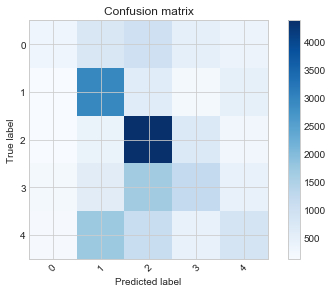

             precision    recall  f1-score   support

          0       0.34      0.11      0.16      2939
          1       0.46      0.68      0.55      4354
          2       0.50      0.75      0.60      5869
          3       0.39      0.30      0.34      4083
          4       0.37      0.20      0.26      4310

avg / total       0.42      0.45      0.41     21555



In [50]:
print_report(logisticprediction,y_test)

# Nearest Neighbour

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knnprediction = knn.predict(x_test)

Accuracy:  0.37620041753653444
Precision:  0.3569448520183273
Recall:  0.37620041753653444
F1_Score:  0.35853657290190133
[[ 681  582  920  454  302]
 [ 412 2324  576  296  746]
 [ 616  621 3408  846  378]
 [ 572  574 1606 1003  328]
 [ 556 1491 1045  525  693]]
Plotting confusion matrix


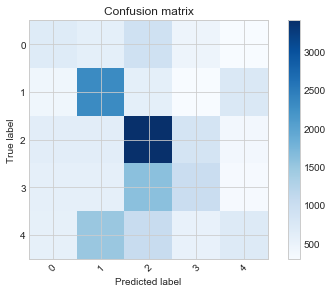

             precision    recall  f1-score   support

          0       0.24      0.23      0.24      2939
          1       0.42      0.53      0.47      4354
          2       0.45      0.58      0.51      5869
          3       0.32      0.25      0.28      4083
          4       0.28      0.16      0.21      4310

avg / total       0.36      0.38      0.36     21555



In [52]:
print_report(knnprediction,y_test)

# Gaussian NB

In [53]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
gnbprediction = clf.predict(x_test)

Accuracy:  0.41758292739503594
Precision:  0.392047102081645
Recall:  0.41758292739503594
F1_Score:  0.36611778143206947
[[ 448 1011  984  332  164]
 [ 222 3210  597  129  196]
 [ 248  762 4141  456  262]
 [ 373  948 1783  744  235]
 [ 297 2157 1136  262  458]]
Plotting confusion matrix


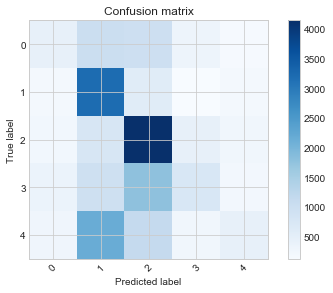

             precision    recall  f1-score   support

          0       0.28      0.15      0.20      2939
          1       0.40      0.74      0.52      4354
          2       0.48      0.71      0.57      5869
          3       0.39      0.18      0.25      4083
          4       0.35      0.11      0.16      4310

avg / total       0.39      0.42      0.37     21555



In [54]:
print_report(gnbprediction,y_test)

# Random Forest

In [55]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
rfprediction = clf.predict(x_test)

Accuracy:  0.4499652052887961
Precision:  0.4353087808968923
Recall:  0.4499652052887961
F1_Score:  0.4375944468026664
[[ 722  476  746  501  494]
 [ 144 2539  289  172 1210]
 [ 335  300 3875  877  482]
 [ 373  431 1389 1383  507]
 [ 368 1535  795  432 1180]]
Plotting confusion matrix


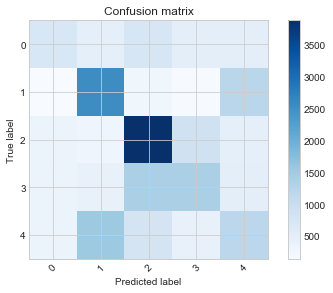

             precision    recall  f1-score   support

          0       0.37      0.25      0.30      2939
          1       0.48      0.58      0.53      4354
          2       0.55      0.66      0.60      5869
          3       0.41      0.34      0.37      4083
          4       0.30      0.27      0.29      4310

avg / total       0.44      0.45      0.44     21555



In [56]:
print_report(rfprediction,y_test)

# Support Vector Machine

In [57]:
clf = SVC(kernel='linear',probability=True)
clf.fit(x_train, y_train)
svmprediction = clf.predict(x_test)

Accuracy:  0.43354210160055673
Precision:  0.403116597684465
Recall:  0.43354210160055673
F1_Score:  0.3940620342652283
[[ 363  844  910  413  409]
 [ 128 2998  637  211  380]
 [ 325  400 4228  395  521]
 [ 253  668 1834  853  475]
 [ 189 1805 1115  298  903]]
Plotting confusion matrix


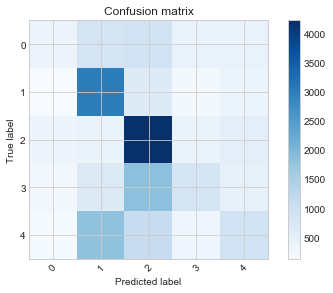

             precision    recall  f1-score   support

          0       0.29      0.12      0.17      2939
          1       0.45      0.69      0.54      4354
          2       0.48      0.72      0.58      5869
          3       0.39      0.21      0.27      4083
          4       0.34      0.21      0.26      4310

avg / total       0.40      0.43      0.39     21555



In [58]:
print_report(svmprediction,y_test)

# Deep Learning Neural Networks

# Fully Connected Networks

In [59]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import os
import io
import requests
from sklearn import metrics

x,y = to_xy(df, 'Category')
x_train_ann_class, x_test_ann_class, y_train_ann_class, y_test_ann_class = train_test_split(x, y, test_size=0.25, random_state=42)
checkpointer = ModelCheckpoint(filepath="ann/best_weights_fairclass.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    model = Sequential()
    model.add(Dense(60, input_dim=x.shape[1], activation='sigmoid')) # Hidden 1
    model.add(Dense(45, activation='sigmoid')) # Hidden 2
    model.add(Dense(30, activation='sigmoid')) # Hidden 3
    model.add(Dense(y.shape[1], activation='softmax')) # Output
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model.fit(x_train_ann_class, y_train_ann_class, validation_data=(x_test_ann_class,y_test_ann_class), callbacks=[monitor,checkpointer], verbose=2, epochs=100)  

    


Train on 80829 samples, validate on 26943 samples
Epoch 1/100
 - 3s - loss: 1.4183 - val_loss: 1.3410
Epoch 2/100
 - 2s - loss: 1.3334 - val_loss: 1.3238
Epoch 3/100
 - 2s - loss: 1.3214 - val_loss: 1.3202
Epoch 4/100
 - 2s - loss: 1.3158 - val_loss: 1.3136
Epoch 5/100
 - 2s - loss: 1.3112 - val_loss: 1.3070
Epoch 6/100
 - 2s - loss: 1.3078 - val_loss: 1.3128
Epoch 7/100
 - 2s - loss: 1.3035 - val_loss: 1.3020
Epoch 8/100
 - 2s - loss: 1.3001 - val_loss: 1.2995
Epoch 9/100
 - 2s - loss: 1.2966 - val_loss: 1.2990
Epoch 10/100
 - 2s - loss: 1.2942 - val_loss: 1.2955
Epoch 11/100
 - 2s - loss: 1.2908 - val_loss: 1.3000
Epoch 12/100
 - 2s - loss: 1.2894 - val_loss: 1.2942
Epoch 13/100
 - 2s - loss: 1.2865 - val_loss: 1.2921
Epoch 14/100
 - 2s - loss: 1.2841 - val_loss: 1.2919
Epoch 15/100
 - 2s - loss: 1.2816 - val_loss: 1.2888
Epoch 16/100
 - 2s - loss: 1.2788 - val_loss: 1.2972
Epoch 17/100
 - 2s - loss: 1.2769 - val_loss: 1.2973
Epoch 18/100
 - 2s - loss: 1.2744 - val_loss: 1.2876
Epoch

In [60]:
model.load_weights('ann/best_weights_fairclass.hdf5')
pred = model.predict(x_test_ann_class)
annpred = np.argmax(pred,axis=1)
y_true= np.argmax(y_test_ann_class,axis=1) 

Accuracy:  0.4693241287161786
Precision:  0.44535691685958617
Recall:  0.4693241287161786
F1_Score:  0.43341265450126243
[[ 587  895 1149  652  333]
 [ 244 3717  747  333  411]
 [ 296  393 5551  911  205]
 [ 355  666 1862 1862  348]
 [ 345 2136 1386  631  928]]
Plotting confusion matrix


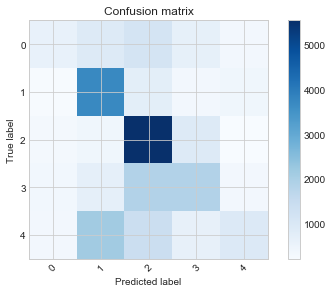

             precision    recall  f1-score   support

          0       0.32      0.16      0.22      3616
          1       0.48      0.68      0.56      5452
          2       0.52      0.75      0.62      7356
          3       0.42      0.37      0.39      5093
          4       0.42      0.17      0.24      5426

avg / total       0.45      0.47      0.43     26943



In [61]:
print_report(annpred,y_true)

# Convolution Neural Networks

In [72]:
x,y = to_xy(df, 'Category')
x_train, x_test, y_train, y_test = train_test_split(df[traincols],df['Category'], test_size=0.2, random_state=42)

In [73]:
x_train = x_train.as_matrix()
x_test = x_test.as_matrix()

C:\Users\rutwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\rutwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [74]:
x_train = x_train.reshape(x_train.shape[0], x.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x.shape[1], 1)

In [75]:
y_train = keras.utils.to_categorical(y_train, y.shape[1])
y_test = keras.utils.to_categorical(y_test, y.shape[1])

In [76]:
import time
batch_size = 64
checkpointer = ModelCheckpoint(filepath="cnn/best_weights_fairclass.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(2):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=(10), strides=(1),activation='relu',input_shape=(182,1))) 
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Conv1D(128, (10), activation='relu'))
    model.add(MaxPooling1D(pool_size=(2), strides=None))
    #model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.summary()
    model.compile(loss="categorical_crossentropy", optimizer="adam")
    start_time = time.time()
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience =5, verbose=2, mode='auto')
    model.fit(x_train, y_train,batch_size=batch_size,epochs=3,verbose=1,validation_data=(x_test, y_test),callbacks=[monitor,checkpointer]) 

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 173, 64)           704       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 86, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 77, 128)           82048     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 38, 128)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4864)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 1024)              4981760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
__________

In [77]:
model.load_weights('cnn/best_weights_fairclass.hdf5')
y_true = np.argmax(y_test,axis=1)
pred = model.predict(x_test)
cnnprediction = np.argmax(pred,axis=1)

Accuracy:  0.4559498956158664
Precision:  0.4247612252052027
Recall:  0.4559498956158664
F1_Score:  0.4177017381214828
[[ 281  691  999  585  383]
 [ 120 2822  609  248  555]
 [ 141  304 4448  731  245]
 [ 156  505 1628 1413  381]
 [ 181 1618 1137  510  864]]
Plotting confusion matrix


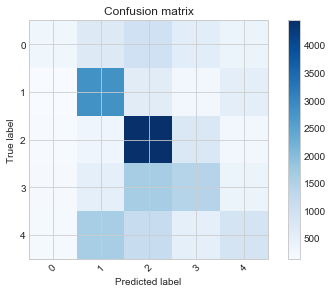

             precision    recall  f1-score   support

          0       0.32      0.10      0.15      2939
          1       0.48      0.65      0.55      4354
          2       0.50      0.76      0.61      5869
          3       0.41      0.35      0.37      4083
          4       0.36      0.20      0.26      4310

avg / total       0.42      0.46      0.42     21555



In [78]:
print_report(cnnprediction,y_true)

# New Models

In [67]:
x_train, x_test, y_train, y_test = train_test_split(df[traincols],df['Category'], test_size=0.2, random_state=42)

# AdaBoost Classifier

In [68]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(x_train, y_train)
ada_pred = model.predict(x_test)

Accuracy:  0.4357689631176061
Precision:  0.4052615537283247
Recall:  0.4357689631176061
F1_Score:  0.3975335296140926
[[ 208  778  910  623  420]
 [ 110 2853  629  251  511]
 [ 103  339 4145  931  351]
 [ 127  644 1573 1319  420]
 [ 111 1715 1080  536  868]]
Plotting confusion matrix


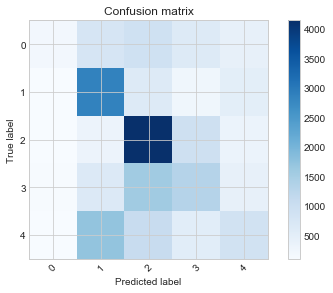

             precision    recall  f1-score   support

          0       0.32      0.07      0.12      2939
          1       0.45      0.66      0.53      4354
          2       0.50      0.71      0.58      5869
          3       0.36      0.32      0.34      4083
          4       0.34      0.20      0.25      4310

avg / total       0.41      0.44      0.40     21555



In [69]:
print_report(ada_pred,y_test)

# XGBOOST Classifier

In [70]:
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(x_train, y_train)
predictions = gbm.predict(x_test)
xgb_pred = model.predict(x_test)

C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy:  0.4357689631176061
Precision:  0.4052615537283247
Recall:  0.4357689631176061
F1_Score:  0.3975335296140926
[[ 208  778  910  623  420]
 [ 110 2853  629  251  511]
 [ 103  339 4145  931  351]
 [ 127  644 1573 1319  420]
 [ 111 1715 1080  536  868]]
Plotting confusion matrix


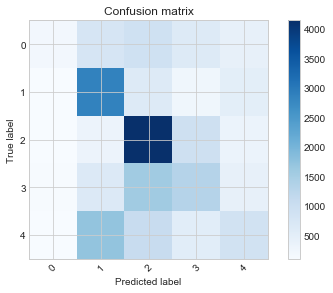

             precision    recall  f1-score   support

          0       0.32      0.07      0.12      2939
          1       0.45      0.66      0.53      4354
          2       0.50      0.71      0.58      5869
          3       0.36      0.32      0.34      4083
          4       0.34      0.20      0.25      4310

avg / total       0.41      0.44      0.40     21555



In [71]:
print_report(xgb_pred,y_test)